In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

minimum distance to see mirage =  10021.968476969729 m
1.832791145860362


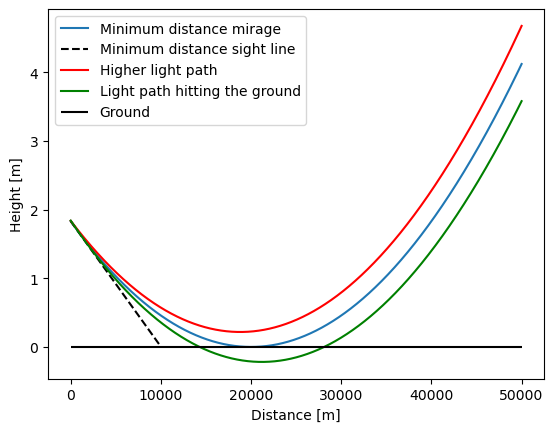

In [15]:
xmax = 50000
xtest = np.linspace(0,xmax,10000)
dx = 0.01

h0 = 2
a = 9.167e-9
b = 1.0003322
c1 = b
d1 = 20000

c2 = b+0.000000002
d2 = 18800

c3 = b-0.000000002
d3 = 21200


xmax0 = -func(0,a,b,c1,d1)*1/((func(dx,a,b,c1,d1)-func(0,a,b,c1,d1))/dx)
xtest2 = np.linspace(0,xmax0,1000)
print("minimum distance to see mirage = ",xmax0,"m")
print(func(0,a,b,c1,d1))
def func(x,a,b,c,d):
    return (-2*b+c*np.exp(a*(x-d)/c)+c*np.exp(-a*(x-d)/c))/(2*a)

plt.plot(xtest,func(xtest,a,b,c1,d1), label = 'Minimum distance mirage')
plt.plot(xtest2,(func(dx,a,b,c1,d1)-func(0,a,b,c1,d1))/dx*xtest2 + func(0,a,b,c1,d1), 'k--',label = 'Minimum distance sight line')
plt.plot(xtest,func(xtest,a,b,c2,d2),'r', label = 'Higher light path')
plt.plot(xtest,func(xtest,a,b,c3,d3),'g', label = 'Light path hitting the ground')
plt.hlines(0,0,xmax,'k', label='Ground')

plt.ylabel('Height [m]')
plt.xlabel('Distance [m]')
plt.legend()
#plt.ylim([-1000, 10000])
plt.savefig('miragefig', dpi = 1000)

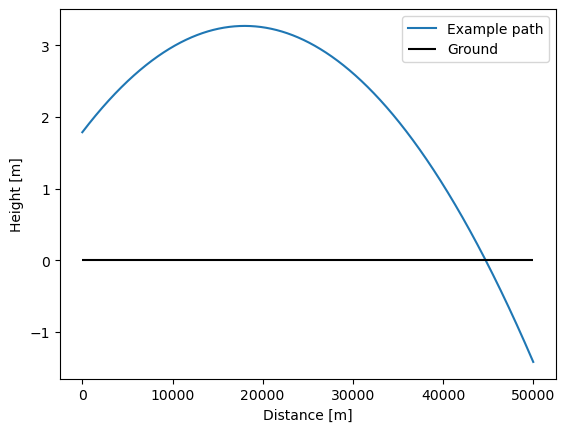

In [38]:
c4 = b-0.00000003
d4 = 18000

plt.plot(xtest,func(xtest,-a,b,c4,d4), label = 'Example path')
plt.hlines(0,0,xmax,'k', label='Ground')
plt.ylabel('Height [m]')
plt.xlabel('Distance [m]')
plt.legend()
plt.savefig('miragefigcold', dpi = 1000)

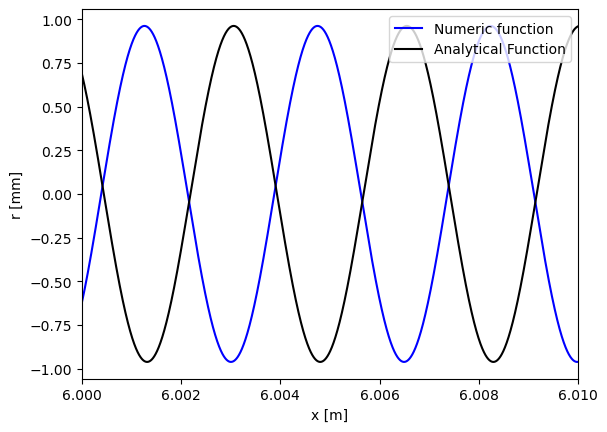

In [41]:
#nsin(i)=a
#sin(i)=dx/ds

cycles = 10000000
ds = 0.000001

a = 50000
alpha = 900
n0 = 100000
x0 = 0
r0 = 0

c = np.pi*a/(n0*alpha)


x = np.zeros(cycles)
x[0] = x0

r = np.zeros(cycles)
r[0] = r0

dx = np.zeros(cycles)

dr = np.zeros(cycles)


def n_r(r,n0,alpha):
    return n0*np.sqrt(1-(alpha**2)*(r**2))


p=-1
for i in np.arange(0,cycles-1,1):
    dx[i+1] = ds*a/(n_r(r[i],n0,alpha))
    
    if dx[i+1] >= ds:
        dx[i+1] = dx[i]
        p *= -1
        
    dr[i+1] = p*np.sqrt(ds**2-dx[i+1]**2)
    
    x[i+1] = x[i] + dx[i+1]
    r[i+1] = r[i] + dr[i+1]

#print(dx)
#print(r)
xtest = np.linspace(0,max(x),cycles)

def rfunc(x,a,alpha,n0,c):
    return (np.sqrt(1-(a/n0)**2)*np.sin((x-c)*n0*alpha/a))/alpha

plt.plot(x,1000*r,'b', label = "Numeric function")
plt.plot(xtest,1000*rfunc(xtest,a,alpha,n0,c),'k', label = "Analytical Function")
plt.ylabel('r [mm]')
plt.xlabel('x [m]')
plt.xlim(6.0,6.01)
plt.rcParams['legend.loc'] = 1
plt.legend()
plt.savefig('fiberfig2', dpi = 1000)


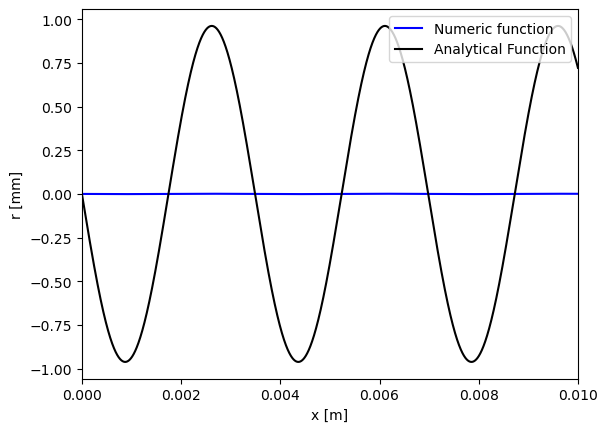

In [40]:
#nsin(i)=a
#sin(i)=dx/ds

cycles = 100000
ds = 0.000001

a = 50000
alpha = 900
n0 = 100000
x0 = 0
r0 = 0

c = np.pi*a/(n0*alpha)


x = np.zeros(cycles)
x[0] = x0

r = np.zeros(cycles)
r[0] = r0

dx = np.zeros(cycles)

dr = np.zeros(cycles)


def n_r(r,n0,alpha):
    return n0*np.sqrt(1-(alpha**2)*(r**2))


p=-1
for i in np.arange(0,cycles-1,1):
    dx[i+1] = ds*a/(n_r(r[i],n0,alpha))
    
    if dx[i+1] >= ds:
        dx[i+1] = dx[i]
        p *= -1
        
    dr[i+1] = p*np.sqrt(ds**2-dx[i+1]**2)
    
    x[i+1] = x[i] + dx[i+1]
    r[i+1] = r[i] + dr[i+1]

#print(dx)
#print(r)
xtest = np.linspace(0,max(x),cycles)

def rfunc(x,a,alpha,n0,c):
    return (np.sqrt(1-(a/n0)**2)*np.sin((x-c)*n0*alpha/a))/alpha

plt.plot(x,r,'b', label = "Numeric function")
plt.plot(xtest,1000*rfunc(xtest,a,alpha,n0,c),'k', label = "Analytical Function")
plt.ylabel('r [mm]')
plt.xlabel('x [m]')
plt.xlim(0.0,0.01)
plt.rcParams['legend.loc'] = 1
plt.legend()
plt.savefig('fiberfig1', dpi = 1000)
